# **ADC**

Conversor Analógico-Digital (ADC) é um hardware capaz de converter um valor **analógico** em um valor **digital**. Os ADCs possuem várias características, sendo as mais importantes:

- Resolução: Qual o tamanho da palavra em bits que o módulo faz a conversão.
- Effective Number of Bits (ENOB): Quantos bits da conversão não possuem ruído.
- Taxa de amostragem máxima: O quão rápido o módulo é capaz de realizar uma conversão.

*Na Pico, os pinos do ADC são: **GP28**, **GP27** e **GP26**.*

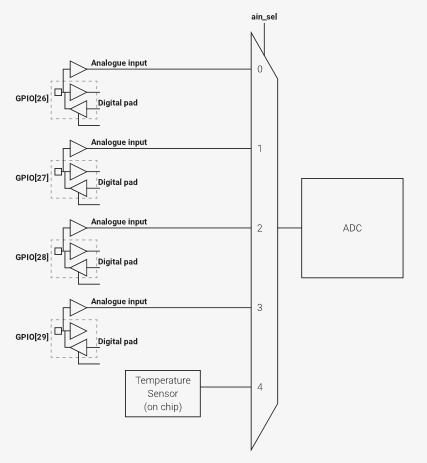

In [ ]:
# lendo um valor no adc
# adc_result = adc_read();


## **PWM**

Pulse Width Modulation (PWM) é uma forma de onda digital periódica que permite modular o tempo em que o sinal permanece em nível alto.

Duty Cycle é o termo utilizado para indicar quanto tempo o sinal do PWM permanece em nível alto. Um Duty Cycle de 40% indica que o sinal fica por 40% do tempo em nível alto e 60% em nível baixo.

Por exemplo:

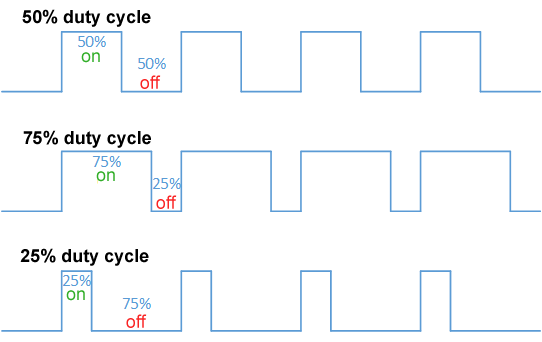

In [ ]:
#gerando um pwm de 33,3% duty

# PWM de 33% de duty cycle via software
while(1) {
    gpio_put(PWM_PIN, 1);
    sleep_ms(2);
    gpio_put(PWM_PIN, 0);
    sleep_ms(4);
}

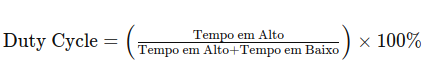

### exemplo de pwm 

O exemplo a seguir configura o pino GP28 para operar com um PWM de 1Mhz com 100 possíveis níveis de Duty Cycle e configura o pino para operar com um Duty Cycle de 40%.




In [ ]:
/**
 * Copyright (c) 2020 Raspberry Pi (Trading) Ltd.
 *
 * SPDX-License-Identifier: BSD-3-Clause
 */

// Output PWM signals on pins 0 and 1

#include "pico/stdlib.h"
#include "hardware/pwm.h"

const int PWM_0_PIN = 28;

int main() {
    // Tell GPIO they are allocated to the PWM
    gpio_set_function(PWM_0_PIN, GPIO_FUNC_PWM);

    // Find out which PWM slice is connected to GPIO
    uint slice_num = pwm_gpio_to_slice_num(PWM_0_PIN);

    // pwm freq
    pwm_set_clkdiv(slice_num, 125); // pwm clock should now be running at 1MHz

    // Set period of 100 cycles (0 to 99 inclusive)
    pwm_set_wrap(slice_num, 100);

    // Set channel A output high for one cycle before dropping
    // PWM set to 30%
    pwm_set_chan_level(slice_num, PWM_CHAN_A, 70);

    // Set the PWM running
    pwm_set_enabled(slice_num, true);

    while(1){


    }
}